<a href="https://colab.research.google.com/github/gabrielamedeirosds/Analise_de_voos/blob/main/Analise_de_voos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando a base de dados

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import datetime, warnings, scipy 

from sklearn.model_selection import train_test_split


In [4]:
voos = pd.read_csv('flights.csv')
companhias = pd.read_csv('airlines.csv')

### Descrição das Variáveis 


* **YEAR:** Ano 
* **MONTH:** Mês 
* **DAY:** Dia
* **DAY_OF_WEEK:** Dia da semana
* **AIRLINE:** Airline Identifier
* **FLIGHT_NUMBER:** Flight Identifier
* **TAIL_NUMBER:** Aircraft Identifier
* **ORIGIN_AIRPORT:** Starting Airport
* **DESTINATION_AIRPORT:** Destination Airport
* **SCHEDULED_DEPARTURE :** Planned Departure Time
* **DEPARTURE_TIME:** Real Departure Time (in minutes)
* **DEPARTURE_DELAY:** Departure Delay (in minutes)
* **ARRIVAL_TIME:** Real arrival time 
* **ARRIVAL_DELAY:** Arrival Delay (in minutes)
* **DISTANCE:** distance (miles)





In [5]:
voos.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
voos.shape

(10492, 31)

##Matriz de Correlação 

é um grau de relação entre duas variáveis quantitativas e exprime o grau de correlação através de valores situados entre **-1** (associação negativa perfeita) e **1** (associação positiva perfeita).

In [8]:
voos.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY_OF_WEEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLIGHT_NUMBER,NaN,NaN,NaN,NaN,1.000000,0.050880,0.058014,0.025554,0.109015,0.062487,...,-0.069983,-0.052298,0.056904,0.024176,0.078980,0.032231,-0.032104,-0.010870,0.068345,0.049221
SCHEDULED_DEPARTURE,NaN,NaN,NaN,NaN,0.050880,1.000000,0.987331,0.084227,-0.134067,0.988710,...,0.888423,0.870374,0.086646,-0.000384,-0.095282,-0.049643,-0.065811,-0.104993,0.157249,-0.150615
DEPARTURE_TIME,NaN,NaN,NaN,NaN,0.058014,0.987331,1.000000,0.205226,-0.127459,0.995988,...,0.879018,0.873534,0.198049,0.002962,0.017806,-0.104527,-0.055740,0.016310,0.303875,-0.107408
DEPARTURE_DELAY,NaN,NaN,NaN,NaN,0.025554,0.084227,0.205226,1.000000,0.024097,0.206657,...,0.098815,0.154973,0.931091,0.030371,0.032579,-0.189356,0.035636,0.744127,0.533728,0.139512
TAXI_OUT,NaN,NaN,NaN,NaN,0.109015,-0.134067,-0.127459,0.024097,1.000000,-0.095892,...,-0.095809,-0.065868,0.174649,0.025573,0.000148,0.396378,-0.023491,-0.036026,-0.075802,0.026376
WHEELS_OFF,NaN,NaN,NaN,NaN,0.062487,0.988710,0.995988,0.206657,-0.095892,1.000000,...,0.880696,0.876092,0.204660,0.004032,0.011363,-0.086503,-0.054796,0.016379,0.302986,-0.105888


In [9]:
voos.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,10492.0,10492.0,10492.0,10492.0,10492.000000,10492.000000,10096.000000,10095.000000,10093.000000,10093.000000,...,10491.000000,10087.000000,10074.000000,10491.000000,10491.000000,1857.000000,1857.000000,1857.000000,1857.000000,1857.000000
mean,2015.0,1.0,1.0,4.0,2174.397350,1175.463877,1192.548336,7.650817,14.940850,1217.707718,...,1416.688590,1427.230197,2.827576,0.001525,0.038223,9.289176,0.130318,20.607970,16.285945,1.631125
std,0.0,0.0,0.0,0.0,1849.834202,340.938632,348.975717,31.124583,6.909411,346.946259,...,360.899624,368.128977,33.409509,0.039025,0.191744,13.607445,2.857656,46.916853,35.407733,12.237245
min,2015.0,1.0,1.0,4.0,1.000000,5.000000,2.000000,-27.000000,3.000000,14.000000,...,5.000000,1.000000,-54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,1.0,4.0,700.000000,910.000000,920.000000,-4.000000,11.000000,936.000000,...,1130.000000,1139.500000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,1.0,4.0,1574.000000,1202.000000,1216.000000,-1.000000,13.000000,1230.000000,...,1429.000000,1435.000000,-4.000000,0.000000,0.000000,3.000000,0.000000,8.000000,0.000000,0.000000
75%,2015.0,1.0,1.0,4.0,3274.000000,1450.000000,1502.000000,8.000000,17.000000,1516.000000,...,1710.000000,1719.000000,8.000000,0.000000,0.000000,16.000000,0.000000,23.000000,19.000000,0.000000
max,2015.0,1.0,1.0,4.0,7438.000000,1740.000000,2354.000000,1190.000000,113.000000,2219.000000,...,2359.000000,2400.000000,1201.000000,1.000000,1.000000,164.000000,107.000000,1169.000000,467.000000,213.000000


In [10]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

##Categorizando Voos Atrasados e Não atrasados

In [30]:
resultado_atraso = []

for i in voos['ARRIVAL_DELAY']:
    
  if i > 10:
    resultado_atraso.append(1)
  else:
    resultado_atraso.append(0) 
  
print(resultado_atraso)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 

In [117]:
voos['RESULTADO_ATRASO'] = resultado_atraso


In [28]:
#Numero de voos por companhia aerea
numeros_voos = voos['AIRLINE'].value_counts()

In [27]:
numeros_voos.head(5)

WN    2005
DL    1291
OO    1174
AA    1104
EV    1054
Name: AIRLINE, dtype: int64

In [18]:
#Numero total de voos não atrasados e atrasados
voos['RESULTADO_ATRASO'].value_counts()

0    8230
1    2262
Name: RESULTADO_ATRASO, dtype: int64

In [20]:
voos_atrasados = voos[voos['RESULTADO_ATRASO']==1]

In [61]:
#Numero total de voos atrasados por companhia aerea
voos_companhia = voos_atrasados['AIRLINE'].value_counts()

In [124]:
#Relação Numero total de voos de cada companhia por numero total de voos atrasados de cada companhia
taxa_atraso = []
taxa_atraso = (voos_companhia / numeros_voos) * 100

In [141]:
voos.groupby('AIRLINE')
by_AIRLINE = voos.groupby('AIRLINE')
by_AIRLINE.describe()['AIRLINE_DELAY']

,count,mean,std,min,25%,50%,75%,max
AIRLINE,,,,,,,,
AA,283.0,26.791519,81.149252,0.0,0.0,5.0,25.00,1169.0
AS,29.0,24.034483,35.310341,0.0,0.0,1.0,30.00,113.0
B6,75.0,21.066667,32.495045,0.0,1.5,10.0,22.50,163.0
DL,83.0,40.831325,70.399698,0.0,1.5,20.0,41.50,511.0
EV,150.0,17.280000,49.254458,0.0,0.0,0.5,13.00,373.0
F9,51.0,12.745098,17.475518,0.0,0.0,8.0,16.50,69.0
HA,28.0,25.250000,35.578421,0.0,7.0,16.0,23.75,186.0
MQ,171.0,19.374269,32.562343,0.0,0.0,9.0,26.00,224.0
NK,45.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [125]:
#Porcentagem de Atraso de cada companhia aérea
taxa_atraso

AA    29.257246
AS    11.145511
B6    17.234848
DL     8.597986
EV    18.121442
F9    33.689840
HA    21.472393
MQ    27.362482
NK    30.303030
OO    29.897785
UA    24.630021
US    17.755682
VX     9.433962
WN    21.895262
Name: AIRLINE, dtype: float64

TypeError: ignored

In [126]:
voos['TAXA_ATRASO'] = taxa_atraso


In [127]:
voos['TAXA_ATRASO'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: TAXA_ATRASO, dtype: float64

In [120]:
voos.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'RESULTADO_ATRASO', 'DATE',
       'TAXA_ATRASO'],
      dtype='object')

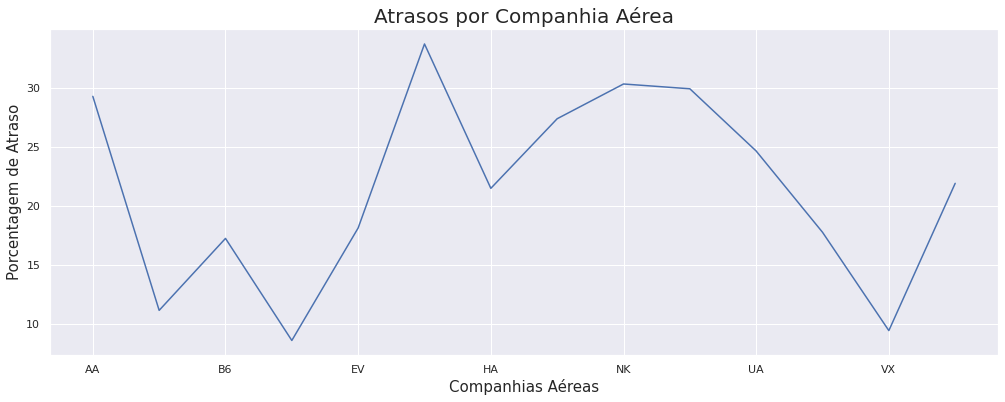

In [108]:
fig, ax = plt.subplots(figsize = (17, 6)) #gera uma tupla com dois objetos

ax.set_title('Atrasos por Companhia Aérea', fontsize = 20)
ax.set_ylabel('Porcentagem de Atraso', fontsize = 15)
ax.set_xlabel('Companhias Aéreas', fontsize = 15)
ax = taxa_atraso.plot()

## Variavel Independente

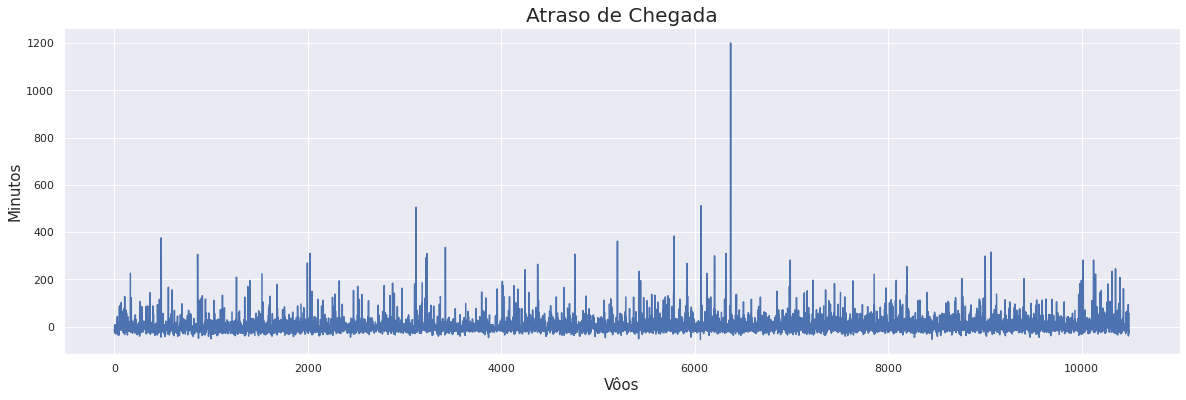

In [47]:
#Plotando a variavel independente
#Como plotar em grafico de linha?

fig, ax = plt.subplots(figsize = (20, 6)) #gera uma tupla com dois objetos

ax.set_title('Atraso de Chegada', fontsize = 20)
ax.set_ylabel('Minutos', fontsize = 15)
ax.set_xlabel('Vôos', fontsize = 15)
ax = voos['ARRIVAL_DELAY'].plot()




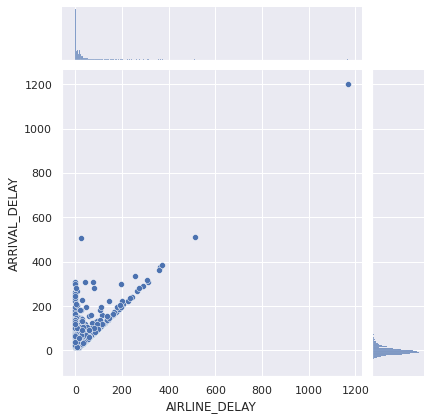

In [55]:
sns.jointplot(data = voos, x="AIRLINE_DELAY", y="ARRIVAL_DELAY")

Text(0, 0.5, 'Atraso (minutos)')

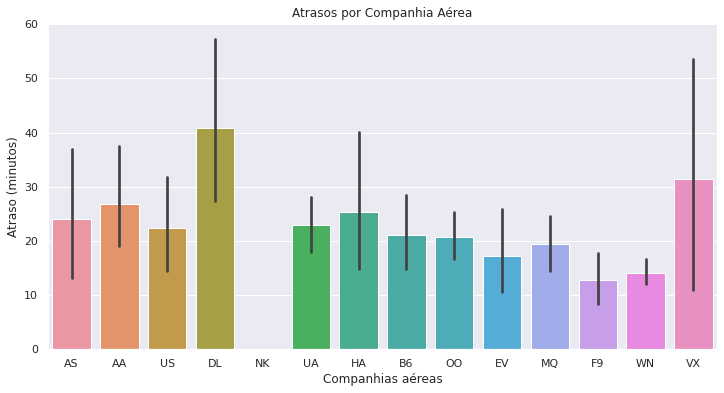

In [56]:
plt.figure(figsize = (12,6))
sns.barplot(data = voos, y = 'AIRLINE_DELAY', x = 'AIRLINE', orient = 'v')
plt.title('Atrasos por Companhia Aérea')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso (minutos)')


##Conversões dos Dados

In [130]:
#Convertendo data

voos['DATE'] = pd.to_datetime(voos[['YEAR','MONTH', 'DAY']])

In [134]:
voos.DAY_OF_WEEK.unique()
#renomear outros dias

array([nan], dtype=object)

In [133]:
days = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

voos.DAY_OF_WEEK = voos.DAY_OF_WEEK.map(days)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f66ade5e690>,
      dtype=object)

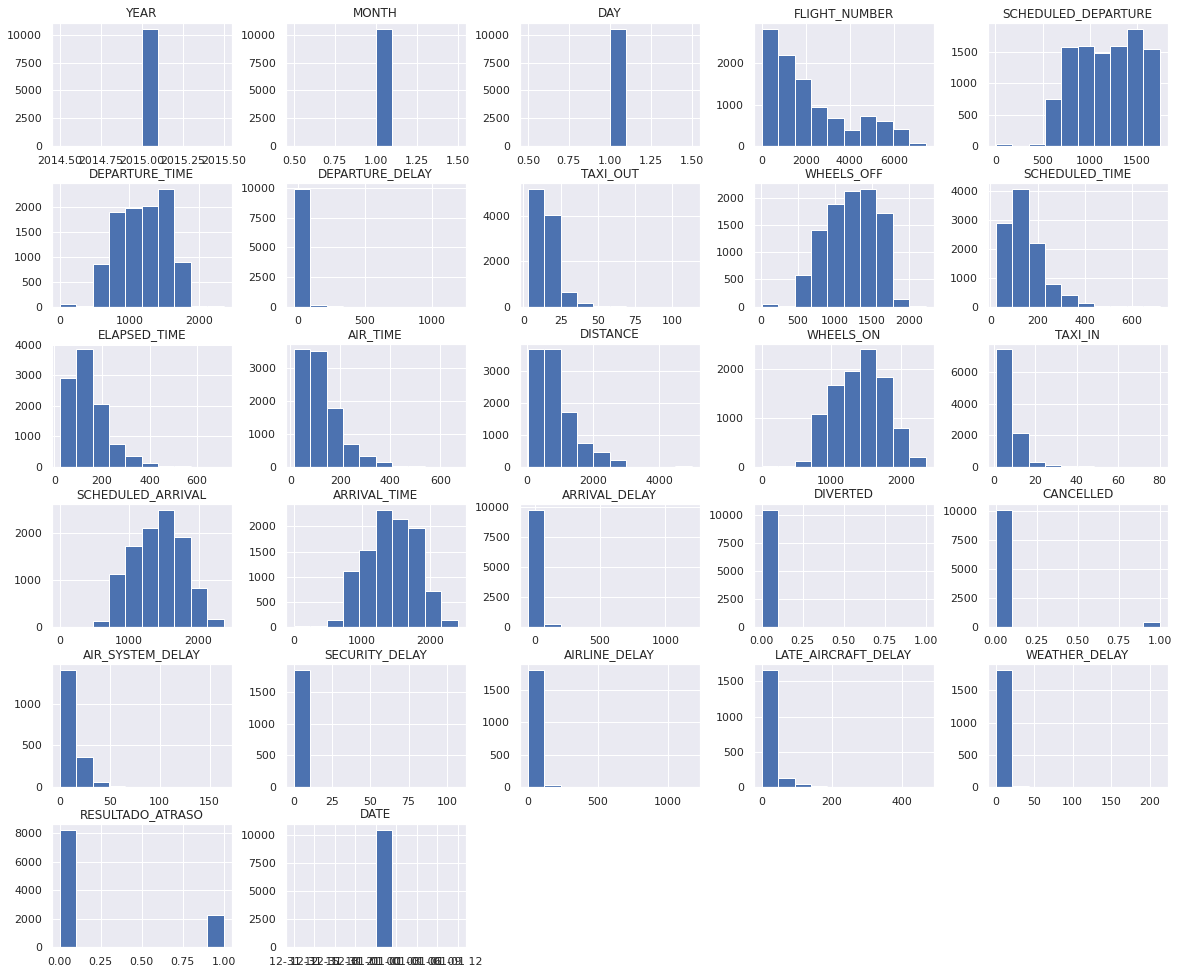

In [82]:
voos.hist(figsize = (20,17))

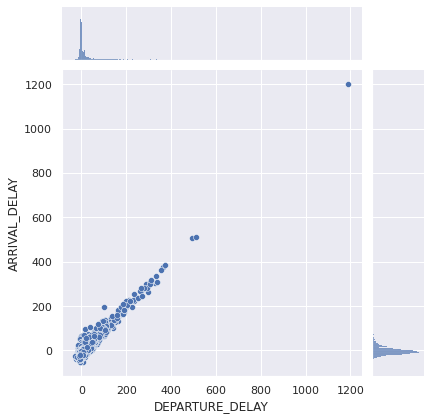

In [83]:
#Relação entre o horário de partida e atraso de chegada
x = 'DEPARTURE_DELAY'
y = 'ARRIVAL_DELAY'
sns.jointplot(data=voos, x="DEPARTURE_DELAY", y="ARRIVAL_DELAY")

In [85]:
companhias = pd.read_csv('airlines.csv')

In [86]:
companhias.head(5)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


##Treinando Modelo

In [135]:
#
X = voos[['AIRLINE'], ['RESULTADO_ATRASO'], ['TAXA_ATRASO'], ['DAY_OF_WEEK'], ['DEPARTURE_DELAY']]
y = voos['ARRIVAL_DELAY']


TypeError: ignored

In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=54)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
predicts = lm.predict(X_test)

In [ ]:
plt.scatter(y_test,predicts)